<a href="https://colab.research.google.com/github/JonasKlotz/XAI_in_SSL/blob/master/src/xai/RELAX_and_LFFI/RELAX_and_LFFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download & upload the two4two dataset to Google Drive (only do this once) 💾



---


⚠️ **YOU NEED TO EXECTUE THESE ↓ TWO CELLS ONLY THE VERY FIRST TIME YOU RUN THIS COLAB ON YOUR GOOGLE ACCOUNT.** ⚠️

My course of action:


1.   Download the two4two dataset from https://www.kaggle.com/datasets/zejokl/two4two
2.   ZIP the "test"-folder into a "test.zip" file
3.   Upload the test.zip to a newly created folder called "242" on [your Google Drive](https://drive.google.com/drive/my-drive)

Thankfully, you only need to do this once - the upload to + unzip onto google drive are permanent!

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

In [ ]:
!unzip ./drive/MyDrive/242/test.zip -d ./drive/MyDrive/242/



---



This notebook has been created and only ran on Google Colab, given we do not posess local capabilities to run this code, and we had no access to the High-Performance Computing (HPC) cluster.



---


# General things to install, run and import 🧑‍🔧️

In [1]:
IMAGE_SIZE = 256

In [2]:
import torch
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#installs lightning-bolts, have run this each colab runtime session
!pip install lightning-bolts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.2/729.2 kB 44.6 MB/s eta 0:00:00


In [5]:
#installs pl-bolts, gotta run this each colab runtime session
!pip install git+https://github.com/PytorchLightning/lightning-bolts.git@master --upgrade

  Cloning https://github.com/PytorchLightning/lightning-bolts.git (to revision master) to /tmp/pip-req-build-a263ae1l
  Running command git clone --filter=blob:none --quiet https://github.com/PytorchLightning/lightning-bolts.git /tmp/pip-req-build-a263ae1l
  Resolved https://github.com/PytorchLightning/lightning-bolts.git to commit 4f910f6c9893eaf206eed6b7df545c8a02043a55
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [6]:
#installs lightning, gotta run this each colab runtime session
!pip install lightning lightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 640.7/640.7 kB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.7/596.7 kB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
#installs captum, gotta run this each colab runtime session
!pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.0 MB/s eta 0:00:00


In [8]:
#download some example images for visualizion/testing our models, have to run this each colab runtime session
!wget -O cat_in_cafe.jpg 'https://upload.wikimedia.org/wikipedia/commons/e/ee/Cat_in_Cat_Caf%C3%A9_Nekokaigi%2C_Tokyo%2C_February_2013.jpg'
!wget -O bird.jpg 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Tringa_totanus-pjt.jpg/640px-Tringa_totanus-pjt.jpg'
!wget -O two_cats.jpg 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Two_Cats_in_a_Corner.jpg/640px-Two_Cats_in_a_Corner.jpg'
!wget -O cat_and_dog_1.jpg 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Cat_and_dog_standoff_%283926784260%29.jpg/640px-Cat_and_dog_standoff_%283926784260%29.jpg'
!wget -O cat_and_dog_2.jpg 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Dog_and_cat_showing_fight_or_flight_responses.jpg/640px-Dog_and_cat_showing_fight_or_flight_responses.jpg'

--2023-07-30 20:11:03--  https://upload.wikimedia.org/wikipedia/commons/e/ee/Cat_in_Cat_Caf%C3%A9_Nekokaigi%2C_Tokyo%2C_February_2013.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201984 (197K) [image/jpeg]
Saving to: ‘cat_in_cafe.jpg’

cat_in_cafe.jpg     100%[===================>] 197.25K  --.-KB/s    in 0.006s  

2023-07-30 20:11:03 (30.6 MB/s) - ‘cat_in_cafe.jpg’ saved [201984/201984]

--2023-07-30 20:11:03--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Tringa_totanus-pjt.jpg/640px-Tringa_totanus-pjt.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26773 (26K) [image/jpe

In [9]:
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import transforms
from torchvision.transforms.functional import pil_to_tensor
from torchvision.transforms import ToTensor, Normalize, Resize

import tqdm.notebook as tqdm

import matplotlib.gridspec as gridspec

import numpy as np

from PIL import Image
import cv2

from matplotlib import pyplot as plt

from pl_bolts.models.self_supervised import SimCLR, SwAV
from pl_bolts.models.autoencoders import VAE

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/usr/local/lib/python3.10/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:92: UnderReviewWarning: The feature FeatureMapContrastiveTask is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  contrastive_task: Union[FeatureMapContrastiveTask] = FeatureMapCon

In [10]:
def imsc(img, *args, quiet=False, lim=None, interpolation='lanczos', **kwargs):
#for visualising images in matplotlib
    if isinstance(img, Image.Image):
        img = pil_to_tensor(img)
    handle = None
    with torch.no_grad():
        if not lim:
            lim = [img.min(), img.max()]
        img = img - lim[0]
        img.mul_(1 / (lim[1] - lim[0]))
        img = torch.clamp(img, min=0, max=1)
        if not quiet:
            bitmap = img.expand(3,
                                *img.shape[1:]).permute(1, 2, 0).cpu().numpy()
    return bitmap

In [11]:
def load_img(img, shape=IMAGE_SIZE):
#load some example images
    if img == 'Ex1':
        img = Image.open(
            './drive/MyDrive/242/test/0a02e7b2-965d-49b2-ba13-93a084b34f3d.png'
            #'./drive/MyDrive/242/test/0a3babf9-8d3f-4240-a9dc-2578d37e9ea6.png'
            ).convert('RGB')
    elif img == 'Ex2':
        img = Image.open(
            '/content/bird.jpg'
            #'/content/cat_in_cafe.jpg'
            ).convert('RGB')
    elif img == 'Ex3':
        img = Image.open(
            '/content/two_cats.jpg'
            #'/content/cat_and_dog_1.jpg'
            #'/content/cat_and_dog_2.jpg'
            ).convert('RGB')
    else:
        print('Incorrect keyword')
        raise

    transform = torchvision.transforms.Compose([
        torchvision.transforms.Resize((shape, shape)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225]),
    ])

    x = transform(img).unsqueeze(0)

    return x.to(DEVICE)

In [12]:
from lightly.loss import NTXentLoss
from lightly.models.modules.heads import SimCLRProjectionHead
import pytorch_lightning as pl

class SimCLRModel(pl.LightningModule):
    def __init__(self):
        super().__init__()

        # create a ResNet backbone and remove the classification head
        resnet = torchvision.models.resnet18()
        self.backbone = nn.Sequential(*list(resnet.children())[:-1])

        hidden_dim = resnet.fc.in_features
        self.projection_head = SimCLRProjectionHead(hidden_dim, hidden_dim, 128)

        self.criterion = NTXentLoss()

    def forward(self, x):
        h = self.backbone(x).flatten(start_dim=1)
        z = self.projection_head(h)
        return z

    def training_step(self, batch, batch_idx):
        (x0, x1), _, _ = batch
        z0 = self.forward(x0)
        z1 = self.forward(x1)
        loss = self.criterion(z0, z1)
        self.log("train_loss_ssl", loss)
        return loss

    def configure_optimizers(self):
        optim = torch.optim.SGD(
            self.parameters(), lr=6e-2, momentum=0.9, weight_decay=5e-4
        )
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optim, max_epochs)
        return [optim], [scheduler]

In [13]:
#load some models

def load_supervised():
  supervised = torchvision.models.resnet50(pretrained=True)
  modules = list(supervised.children())[:-1]
  supervised = nn.Sequential(*modules, nn.Flatten()).to(DEVICE)
  supervised.eval()
  return supervised

def load_swav():
  swav_weight_path = 'https://pl-bolts-weights.s3.us-east-2.amazonaws.com/swav/swav_imagenet/swav_imagenet.pth.tar'
  swav = SwAV.load_from_checkpoint(swav_weight_path, strict=False)
  swav = swav.to(DEVICE)
  swav.eval()
  return swav


def load_simclr():
  simclr_weight_path = 'https://pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imagenet/simclr_imagenet.ckpt'
  simclr = SimCLR.load_from_checkpoint(simclr_weight_path, strict=False)
  simclr = simclr.to(DEVICE)
  simclr.eval()
  return simclr

#please download the pretrained model here: https://drive.google.com/file/d/1JQ-0-e-MHXXPtthKV_mq8MR2Gf4S-fuS/view?usp=drive_link
#and put it in the /242/ folder on your Google drive.
def load_pretrained_simclr():
  pretrained_simclr_path = './drive/MyDrive/242/full_model3.pth'
  pt_simclr = torch.load(pretrained_simclr_path)
  pt_simclr = pt_simclr.to(DEVICE)
  pt_simclr.eval()
  return pt_simclr

def load_vae():
    vae = VAE(input_height=IMAGE_SIZE).from_pretrained('stl10-resnet18')
    modules = list(vae.children())[:-3]
    vae = nn.Sequential(*modules, nn.Flatten()).to(DEVICE)
    vae.eval()
    return vae

In [14]:
#dowload models

load_supervised()
load_swav()
load_simclr()
load_vae()
load_pretrained_simclr()

print('done')

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 360MB/s]
Downloading: "https://pl-bolts-weights.s3.us-east-2.amazonaws.com/swav/swav_imagenet/swav_imagenet.pth.tar" to /root/.cache/torch/hub/checkpoints/swav_imagenet.pth.tar
100%|██████████| 322M/322M [00:26<00:00, 12.6MB/s]
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v0.9.1rc3 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/swav/swav_imagenet/swav_imagenet.pth.tar`
Downloading: "https://pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imagenet/simclr_imagenet.ckpt" to /root/.cache/torch/hub/checkpoints/simclr_imagenet.ckpt
100%|██████████| 229M/229M [00:20<00:00, 11.7MB/s]
INFO:pytorch_lightning.utili

done


In [15]:
def load_img_from_drive(img_name, shape=IMAGE_SIZE):
  #loads two4two images from personal drive (after they have been uploaded and unzipped)
    img = Image.open('./drive/MyDrive/242/test/{}'.format(img_name)).convert('RGB')

    transform = torchvision.transforms.Compose([
        torchvision.transforms.Resize((shape, shape)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225]),
    ])

    x = transform(img).unsqueeze(0)

    return x.to(DEVICE)

In [16]:
def load_mask_from_drive(mask_name, shape=IMAGE_SIZE):
  #loads two4two masks from personal drive (after they have been uploaded and unzipped)
    mask = cv2.imread('./drive/MyDrive/242/test/{}'.format(mask_name))

    target_transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor(), torchvision.transforms.Resize((shape, shape))])
    mask = target_transform(mask).sum(dim=0).unsqueeze(dim=0)

    mask = torch.where(mask > 0, torch.tensor(1), torch.tensor(0))

    return mask

In [17]:
def to_np(x):
    return x.cpu().detach().numpy()



---


# 🅰️ RELAX: REPRESENTATION LEARNING EXPLAINABILITY

## RELAX backend 🧠

In [18]:
class RELAX(nn.Module):
    def __init__(self, x, f, num_batches, batch_size):
        super().__init__()

        self.device = x.device
        self.batch_size = batch_size #number of masks to draw per batch
        self.num_batches = num_batches #number of batches to draw 'batch_size' masks
        self.shape = tuple(x.shape[2:])
        self.pdist = nn.CosineSimilarity(dim=1) #comparison metric to use

        self.x = x
        self.encoder = f
        self.h_star = f(x).expand(batch_size, -1) #embedding of our unmasked input image

        self.R = torch.zeros(self.shape, device=self.device) #importance scores
        self.U = torch.zeros(self.shape, device=self.device) #uncertainty scores

        self.sum_of_weights = (1e-10)*torch.ones(self.shape, device=self.device) #needed for running mean

    def forward(self):

        for batch in range(self.num_batches):
            for masks in self.mask_generator():

                x_mask = self.x * masks
                h = self.encoder(x_mask)
                sims = self.pdist(self.h_star, h)

                for si, mi in zip(sims, masks.squeeze()):
                    #one-pass implementation of RELAX
                    #i.e. we're using estimators of running mean and variance
                    W_prev = self.sum_of_weights
                    self.sum_of_weights += mi

                    R_prev = self.R.clone()
                    self.R = self.R + mi*(si-self.R) / self.sum_of_weights
                    self.U = self.U + (si-self.R) * (si-R_prev) * mi

        return None

    def importance(self):
        return self.R

    def uncertainty(self):
        return self.U / (self.sum_of_weights - 1)

    def mask_generator(self, num_cells=7, p=0.5, nsd=2):
        #breaks up image into num_cells*num_cells patches, which are randomly occluded in relax
        pad_size = (num_cells // 2, num_cells // 2, num_cells // 2, num_cells // 2)
        grid = (torch.rand(self.batch_size, 1, *((num_cells,) * nsd), device=self.device) < p).float()

        #upsample mask to image size
        grid_up = F.interpolate(grid, size=(self.shape), mode='bilinear', align_corners=False)
        grid_up = F.pad(grid_up, pad_size, mode='reflect')

        #generate random ints to additionally randomly shift a mask by some pixels
        shift_x = torch.randint(0, num_cells, (self.batch_size,), device=self.device)
        shift_y = torch.randint(0, num_cells, (self.batch_size,), device=self.device)

        masks = torch.empty((self.batch_size, 1, self.shape[-2], self.shape[-1]), device=self.device)

        for bi in range(self.batch_size):
            #upscale randomly shifted masks
            masks[bi] = grid_up[bi, :,
                                shift_x[bi]:shift_x[bi] + self.shape[-2],
                                shift_y[bi]:shift_y[bi] + self.shape[-1]]

        yield masks

## RELAX Visualization Examples 👀

### Example 1 (two4two) 🦠

In [19]:
x = load_img('Ex1')

#apply relax
model_name_list = ['Supervised', 'VAE', 'SwAV', 'SimCLR', 'Custom SimCLR']
model_list = [load_supervised, load_vae, load_swav, load_simclr, load_pretrained_simclr]
relax_list = []

mask_bs = 100
num_batches = 30

for model_loader, model_name in zip(model_list, model_name_list):

    model = model_loader()

    with torch.no_grad():

        relax = RELAX(x, model, num_batches, mask_bs)
        relax.forward()

    relax_list.append(relax)

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v0.9.0 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/vae/vae-stl10/checkpoints/epoch%3D89.ckpt`
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v0.9.1rc3 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/swav/swav_imagenet/swav_imagenet.pth.tar`
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.0.4 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imag

In [20]:
#load mask
mask = cv2.imread('./drive/MyDrive/242/test/0a02e7b2-965d-49b2-ba13-93a084b34f3d_mask.png')

# binarize mask with open cv thresh
target_transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor(), torchvision.transforms.Resize((IMAGE_SIZE, IMAGE_SIZE))])
# convert into 1 channel
mask = target_transform(mask).sum(dim=0).unsqueeze(dim=0)
# binarize mask
mask = torch.where(mask > 0, torch.tensor(1), torch.tensor(0))

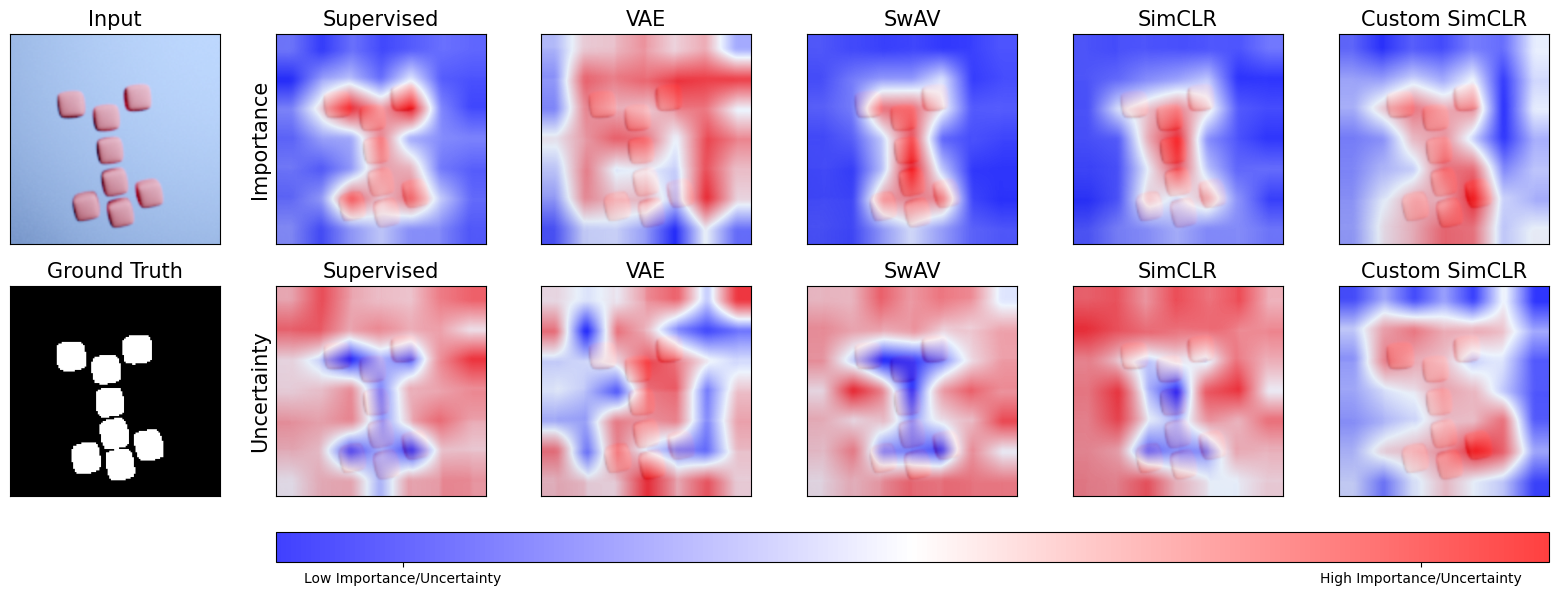

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))

font_size = 15

#iterate over generated relax explenations and visualize them + their uncertainty scores
for idx, (model_explanation, model_name) in enumerate(zip(relax_list, model_name_list)):

    #importance map
    if idx == 0: ax[0][idx+1].set_ylabel('Importance', fontsize=font_size)
    ax[0][idx+1].imshow(imsc(x[0]))
    im = ax[0][idx+1].imshow(to_np(model_explanation.importance()), alpha=0.75, cmap='bwr')
    ax[0][idx+1].set_xticks([])
    ax[0][idx+1].set_yticks([])
    ax[0][idx+1].set_title(model_name, fontsize=font_size)

    #uncertainty map
    if idx == 0: ax[1][idx+1].set_ylabel('Uncertainty', fontsize=font_size)
    ax[1][idx+1].imshow(imsc(x[0]))
    ax[1][idx+1].imshow(to_np(model_explanation.uncertainty()), alpha=0.75, cmap='bwr')
    ax[1][idx+1].set_xticks([])
    ax[1][idx+1].set_yticks([])
    ax[1][idx+1].set_title(model_name, fontsize=font_size)

#visualize input image
ax[0][0].imshow(imsc(x[0]))
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][0].set_title('Input', fontsize=font_size)

#visualize mask
ax[1][0].imshow(mask.squeeze(), cmap='gist_gray')
ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][0].set_title('Ground Truth', fontsize=font_size)

#calculate position for horizontal colorbar
p0 = ax[1][1].get_position().get_points().flatten()
p2 = ax[1][-1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0, p2[2]-p0[0], 0.05])
cbar = fig.colorbar(im, orientation="horizontal", cax=ax_cbar)
#cbar.set_ticks([])

#colorbar labels
inter_dist = im.get_array().max() - im.get_array().min()
p_10 = im.get_array().min() + inter_dist * 0.1
p_90 = im.get_array().min() + inter_dist * 0.9
cbar.set_ticks([p_10, p_90])
cbar.ax.set_xticklabels(['Low Importance/Uncertainty', 'High Importance/Uncertainty'])

plt.show()

In [22]:
#calculate top-k for this example, just for fun
#we choose index=2 meaning for the SwAV model
a=to_np(relax_list[2].importance().cpu().squeeze())
s=to_np(mask.squeeze())

k=1000
#prepare shapes
s = s.astype(bool)
top_k_binary_mask = np.zeros(a.shape)

#sort and create masks
sorted_indices = np.argsort(a, axis=None)
np.put_along_axis(top_k_binary_mask, sorted_indices[-k:], 1, axis=None)
top_k_binary_mask = top_k_binary_mask.astype(bool)

#top-k intersection
tki = 1.0 / k * np.sum(np.logical_and(s, top_k_binary_mask))

print(tki)

0.897


### Example 2 (bird) 🐦

In [23]:
x = load_img('Ex2')

model_name_list = ['Supervised', 'VAE', 'SwAV', 'SimCLR', 'Custom SimCLR']
model_list = [load_supervised, load_vae, load_swav, load_simclr, load_pretrained_simclr]
relax_list = []

mask_bs = 100
num_batches = 30

for model_loader, model_name in zip(model_list, model_name_list):

    model = model_loader()

    with torch.no_grad():

        relax = RELAX(x, model, num_batches, mask_bs)
        relax.forward()

    relax_list.append(relax)

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v0.9.0 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/vae/vae-stl10/checkpoints/epoch%3D89.ckpt`
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v0.9.1rc3 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/swav/swav_imagenet/swav_imagenet.pth.tar`
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.0.4 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imag

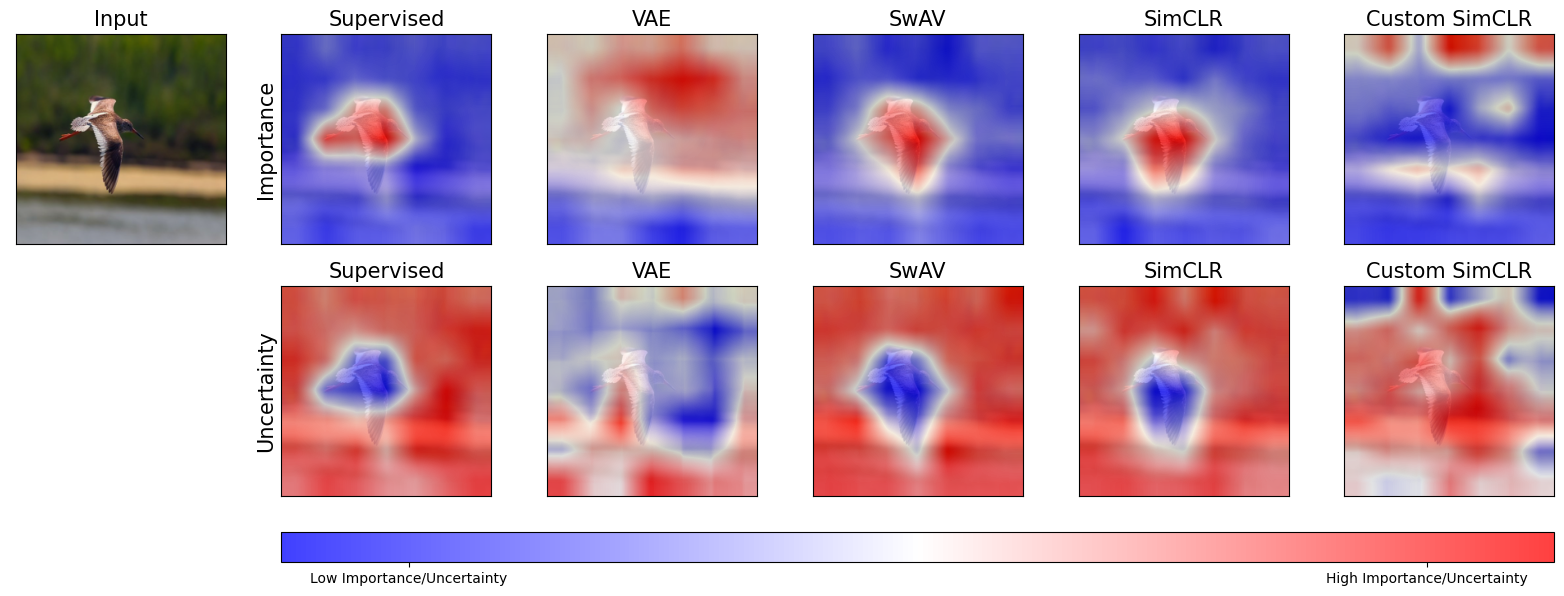

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))

font_size = 15

#iterate over generated relax explenations and visualize them + their uncertainty scores
for idx, (model_explanation, model_name) in enumerate(zip(relax_list, model_name_list)):

    #importance map
    if idx == 0: ax[0][idx+1].set_ylabel('Importance', fontsize=font_size)
    ax[0][idx+1].imshow(imsc(x[0]))
    im = ax[0][idx+1].imshow(to_np(model_explanation.importance()), alpha=0.75, cmap='bwr')
    ax[0][idx+1].set_xticks([])
    ax[0][idx+1].set_yticks([])
    ax[0][idx+1].set_title(model_name, fontsize=font_size)

    #uncertainty map
    if idx == 0: ax[1][idx+1].set_ylabel('Uncertainty', fontsize=font_size)
    ax[1][idx+1].imshow(imsc(x[0]))
    ax[1][idx+1].imshow(to_np(model_explanation.uncertainty()), alpha=0.75, cmap='bwr')
    ax[1][idx+1].set_xticks([])
    ax[1][idx+1].set_yticks([])
    ax[1][idx+1].set_title(model_name, fontsize=font_size)

#visualize input image
ax[0][0].imshow(imsc(x[0]))
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][0].set_title('Input', fontsize=font_size)

#visualize mask
#ax[1][0].imshow(mask.squeeze(), cmap='gist_gray') #we have no segmentation mask for this data
ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][0].set(frame_on=False)
#ax[1][0].set_title('Ground Truth', fontsize=font_size) #we have no segmentation mask for this data

#calculate position for horizontal colorbar
p0 = ax[1][1].get_position().get_points().flatten()
p2 = ax[1][-1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0, p2[2]-p0[0], 0.05])
cbar = fig.colorbar(im, orientation="horizontal", cax=ax_cbar)
#cbar.set_ticks([])

#colorbar labels
inter_dist = im.get_array().max() - im.get_array().min()
p_10 = im.get_array().min() + inter_dist * 0.1
p_90 = im.get_array().min() + inter_dist * 0.9
cbar.set_ticks([p_10, p_90])
cbar.ax.set_xticklabels(['Low Importance/Uncertainty', 'High Importance/Uncertainty'])

plt.show()

### Example 3 (2 cats) 🐈🐈‍⬛

In [25]:
x = load_img('Ex3')

model_name_list = ['Supervised', 'VAE', 'SwAV', 'SimCLR', 'Custom SimCLR']
model_list = [load_supervised, load_vae, load_swav, load_simclr, load_pretrained_simclr]
relax_list2 = []

mask_bs = 100
num_batches = 30

for model_loader, model_name in zip(model_list, model_name_list):

    model = model_loader()

    with torch.no_grad():

        relax = RELAX(x, model, num_batches, mask_bs)
        relax.forward()

    relax_list2.append(relax)

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v0.9.0 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/vae/vae-stl10/checkpoints/epoch%3D89.ckpt`
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v0.9.1rc3 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/swav/swav_imagenet/swav_imagenet.pth.tar`
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.0.4 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imag

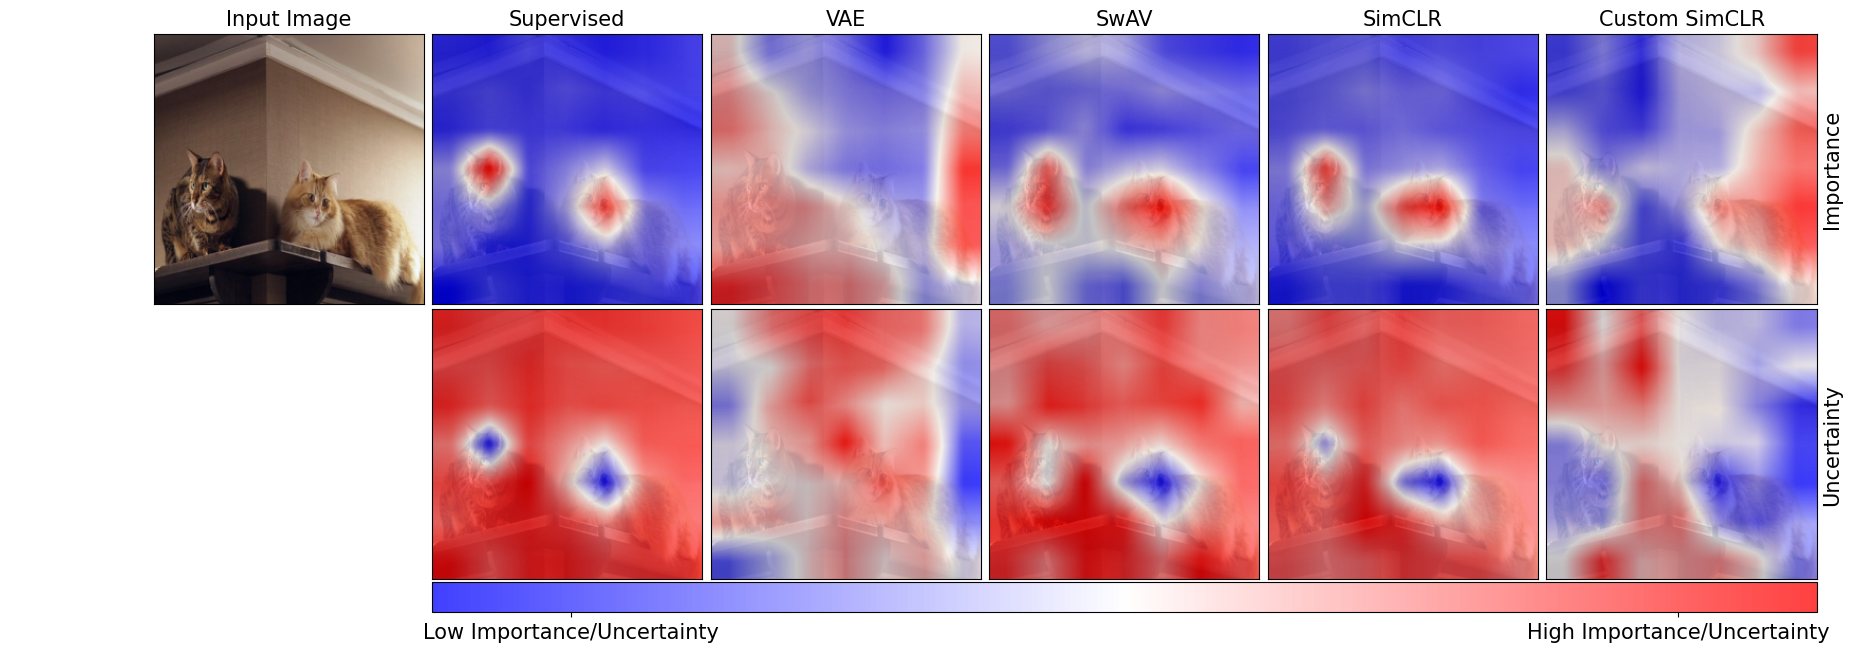

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))

font_size = 15

#iterate over generated relax explenations and visualize them + their uncertainty scores
for idx, (model_explanation, model_name) in enumerate(zip(relax_list2, model_name_list)):

    #importance map
    ax[0][5].yaxis.set_label_position("right")
    ax[0][5].set_ylabel('Importance', fontsize=font_size)
    #if idx == 0: ax[0][idx+1].set_ylabel('Importance', fontsize=font_size)
    ax[0][idx+1].imshow(imsc(x[0]))
    im = ax[0][idx+1].imshow(to_np(model_explanation.importance()), alpha=0.75, cmap='bwr')
    ax[0][idx+1].set_xticks([])
    ax[0][idx+1].set_yticks([])
    ax[0][idx+1].set_title(model_name, fontsize=font_size)

    #uncertainty map
    ax[1][5].yaxis.set_label_position("right")
    ax[1][5].set_ylabel('Uncertainty', fontsize=font_size)
    ax[1][idx+1].imshow(imsc(x[0]))
    ax[1][idx+1].imshow(to_np(model_explanation.uncertainty()), alpha=0.75, cmap='bwr')
    ax[1][idx+1].set_xticks([])
    ax[1][idx+1].set_yticks([])
    #ax[1][idx+1].set_title(model_name, fontsize=font_size)

#visualize input image
ax[0][0].imshow(imsc(x[0]))
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][0].set_title('Input Image', fontsize=font_size)

#visualize mask
#ax[1][0].imshow(mask.squeeze(), cmap='gist_gray') #we have no segmentation mask for this data
ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][0].set(frame_on=False)
#ax[1][0].set_title('Ground Truth', fontsize=font_size) #we have no segmentation mask for this data

plt.tight_layout()

plt.subplots_adjust(wspace=-0.5, hspace=0.02)

#calculate position for horizontal colorbar
p0 = ax[1][1].get_position().get_points().flatten()
p2 = ax[1][-1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], -0.03, p2[2]-p0[0], 0.05])
cbar = fig.colorbar(im, orientation="horizontal", cax=ax_cbar)
#cbar.set_ticks([])

#colorbar labels
inter_dist = im.get_array().max() - im.get_array().min()
p_10 = im.get_array().min() + inter_dist * 0.1
p_90 = im.get_array().min() + inter_dist * 0.9
cbar.set_ticks([p_10, p_90])
cbar.ax.set_xticklabels(['Low Importance/Uncertainty', 'High Importance/Uncertainty'])
cbar.ax.tick_params(labelsize=font_size)

plt.show()

## RELAX QUANTITATIVE EXPERIMENT 🧑‍🔬️

In [ ]:
import logging
log = logging.getLogger("pytorch_lightning")
log.propagate = False
log.setLevel(logging.ERROR)

log = logging.getLogger("lightning_fabric")
log.propagate = False
log.setLevel(logging.ERROR)

In [ ]:
# on Google Colab this takes a very, very long time
# we run out of alocated daily resources early
# we thus had to run this multiple times over multiple google accounts
# and calculate the mean over all the runs for our final quantitative result.
# the metrics didn't change much at all over the different runs, they converge fairly fast

from google.colab import drive
import os

drive.mount('/content/drive')
list_images = sorted(os.listdir('drive/MyDrive/242/test'))

model_name_list = ['Supervised', 'SimCLR', 'SwAV', 'VAE', 'Custom SimCLR']
model_list = [load_supervised, load_simclr, load_swav, load_vae, load_pretrained_simclr]
mask_bs = 100
num_batches = 30

tk_list = []
pg_list = []
rra_list = []

print(model_name_list)
#we have a total of 5k images and 5k masks for the images
#iterate over images + masks
for i in range(303,5000):
  relax_list = []
  tk_indv_list = []
  pg_indv_list = []
  rra_indiv_list = []
  image_name = list_images[i*2]
  mask_name = list_images[(i*2)+1]
  x = load_img_from_drive(image_name)
  mask = load_mask_from_drive(mask_name)

  #iterate over models
  for model_loader, model_name in zip(model_list, model_name_list):

    model = model_loader()

    with torch.no_grad():

        relax = RELAX(x, model, num_batches, mask_bs)
        relax.forward()

    relax_list.append(relax)

  #iterate over models' results
  for j in range(len(model_list)):
    s=to_np(mask.squeeze())
    a=to_np(relax_list[j].importance().cpu().squeeze())

    k=1000
    #prepare shapes
    s = s.astype(bool)
    top_k_binary_mask = np.zeros(a.shape)

    #top-k intersection
    #sort and create masks
    sorted_indices = np.argsort(a, axis=None)
    np.put_along_axis(top_k_binary_mask, sorted_indices[-k:], 1, axis=None)
    top_k_binary_mask = top_k_binary_mask.astype(bool)
    tki = 1.0 / k * np.sum(np.logical_and(s, top_k_binary_mask))

    #pointing game
    a_pg = a.copy().flatten()
    s_pg = to_np(mask.squeeze()).flatten().astype(bool)
    #find indices with max value
    max_index = np.argwhere(a_pg == np.max(a_pg))
    #check if maximum of explanation is on target object class.
    hit = np.any(s_pg[max_index])

    #relevance rank accuracy
    s = to_np(mask.squeeze())
    s = np.where(s.flatten().astype(bool))[0]
    #size of the ground truth mask
    n = len(s)
    #sort in descending order
    a_sorted = np.argsort(a.flatten())[-int(n) :]
    #calculate hits
    hits = len(np.intersect1d(s, a_sorted))
    if hits != 0:
        rank_accuracy = hits / float(n)
    else:
        rank_accuracy = 0.0

    tk_indv_list.append(tki)
    pg_indv_list.append(np.float(hit))
    rra_indiv_list.append(rank_accuracy)
  tk_list.append(tk_indv_list)
  pg_list.append(pg_indv_list)
  rra_list.append(rra_indiv_list)
  if i % 1 == 0: #print rolling mean after every **1** images processed.ss
    print(i)
    print('Pointing Game:')
    print(np.array(pg_list).mean(axis=0))
    print('Top-K:')
    print(np.array(tk_list).mean(axis=0))
    print('Relevance Rank Acc.:')
    print(np.array(rra_list).mean(axis=0))



---


# 🅱️ LFFI: LABEL-FREE FEATURE IMPORTANCE

## LFFI backend 🧠

In [27]:
#implementation of label-free feature importancesss
from captum.attr import Attribution, Saliency
from torch.nn import Module

class AuxiliaryModule(Module):
  def __init__(self, black_box, base_features):
  #black_box must be a PyTorch Module
  #base_features is a torch tensor
    super().__init__()
    self.black_box = black_box
    self.base_features = base_features
    self.prediction = black_box(base_features)

  def forward(self, input_features):
    #if only one input
    if len(self.prediction) == len(input_features):
      #dot product
      return torch.sum(self.prediction * self.black_box(input_features), dim=-1)
    #if we have an input batch
    elif len(input_features) % len(self.prediction) == 0:
      n_repeat = int(len(input_features) / len(self.prediction))
      #dot product
      return torch.sum(
          self.prediction.repeat(n_repeat, 1) * self.black_box(input_features),
          dim=-1,
      )

def lffi(encoder, data_loader, device, attr_method, baseline):
#label-free feature importance wrapper
#encoder must be a PyTorch Module
#data_loader must be a PyTorch DataLoader
#attr_method must be an attribution method from Captum (grad-shap or ig)
  attributions = []
  for inputs, _ in data_loader:
    inputs = inputs.to(device)
    auxiliary_encoder = AuxiliaryModule(encoder, inputs)
    attr_method.forward_func = auxiliary_encoder
    attributions.append(
      attr_method.attribute(inputs, baseline).detach().cpu().numpy()
      )
  return np.concatenate(attributions)

## LFFI MNIST toy example 🔢

In [28]:
class MNIST_Encoder(nn.Module):
  #toy model to test out label-free image importance on the MNIST dataset
  def __init__(self, encoding_dim):
    super().__init__()

    self.encoder = nn.Sequential(
      nn.Conv2d(1, 8, 3, stride=2, padding=1),
      nn.ReLU(True),
      nn.Conv2d(8, 16, 3, stride=2, padding=1),
      nn.BatchNorm2d(16),
      nn.ReLU(True),
      nn.Conv2d(16, 32, 3, stride=2, padding=0),
      nn.ReLU(True),
    )

    self.flatten = nn.Flatten(start_dim=1)

    self.embedding = nn.Sequential(
      nn.Linear(3 * 3 * 32, 128),
      nn.ReLU(True),
      nn.Linear(128, encoding_dim)
    )

  def forward(self, x):
    x = self.encoder(x)
    x = self.flatten(x)
    x = self.embedding(x)
    return x

In [29]:
import torch
from pathlib import Path
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, Subset
from captum.attr import (
    GradientShap,
    IntegratedGradients
)

#load data
data_dir = Path.cwd() / "data/mnist"
train_dataset = MNIST(data_dir, train=True, download=True)
test_dataset = MNIST(data_dir, train=False, download=True)

train_dataset.transform = transforms.Compose([transforms.ToTensor()])
test_dataset.transform = transforms.Compose([transforms.ToTensor()])

train_loader = DataLoader(train_dataset, batch_size=100)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

#create a model
encoder = MNIST_Encoder(encoding_dim=10).to(DEVICE)

# Get label-free feature importance
baseline = torch.zeros((1, 1, 28, 28)).to(DEVICE) # black image as baseline
attr_method1 = GradientShap(encoder)
attr_method2 = IntegratedGradients(encoder)
feature_importance_shap = lffi(encoder, test_loader, DEVICE, attr_method1, baseline)
feature_importance_ig = lffi(encoder, test_loader, DEVICE, attr_method2, baseline)

100%|██████████| 9912422/9912422 [00:00<00:00, 301282002.70it/s]

Extracting /content/data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 82014687.76it/s]


Extracting /content/data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 118242599.41it/s]


Extracting /content/data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22203413.48it/s]

Extracting /content/data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/mnist/MNIST/raw



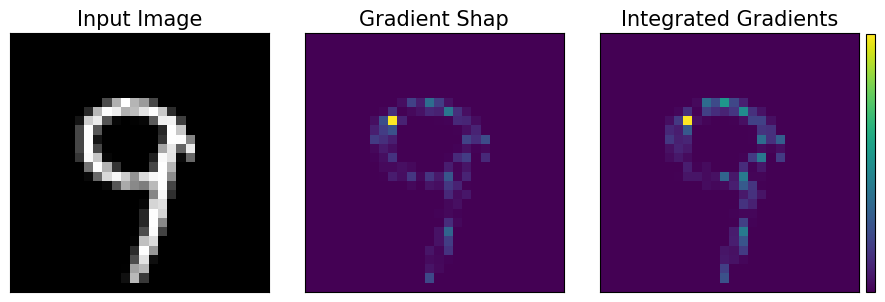

In [30]:
#CHOOSE ANY image_index OF YOUR LIKING BETWEEN 0 and 9999
image_index = 2345

alpha = 1 #0.75

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))

input = test_dataset[image_index][0][0]
ax[0].imshow(input, cmap='gist_gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("Input Image", fontsize=15)

ax[1].imshow(input)
im = ax[1].imshow(np.abs(feature_importance_shap[image_index,0]), alpha=alpha)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("Gradient Shap", fontsize=15)

ax[2].imshow(input)
im = ax[2].imshow(np.abs(feature_importance_ig[image_index,0]), alpha=alpha)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("Integrated Gradients", fontsize=15)

plt.tight_layout()
cbar_ax = plt.axes([0.98, 0.05, 0.01, 0.86])
cbar = plt.colorbar(im, cax=cbar_ax)
cbar.set_ticks([])
plt.show()

## LFFI Visualization Examples 👀

### Example 1 (two4two) 🦠

In [31]:
#example image 1 for visualization
x = load_img('Ex1')
test_loader = DataLoader([[x[0], torch.Tensor([0])]], batch_size=1, shuffle=False)

model_name_list = ['Supervised', 'VAE', 'SwAV', 'SimCLR', 'Custom SimCLR']
model_list = [load_supervised, load_vae, load_swav, load_simclr, load_pretrained_simclr]
shap_list = []
ig_list = []

for model_loader, model_name in zip(model_list, model_name_list):

  model = model_loader()

  with torch.no_grad():

    baseline = torch.zeros((1, 3, 256, 256)).to(DEVICE) # black image as baseline
    attr_method1 = GradientShap(model)
    attr_method2 = IntegratedGradients(model)
    feature_importance_shap = lffi(model, test_loader, DEVICE, attr_method1, baseline)
    feature_importance_ig = lffi(model, test_loader, DEVICE, attr_method2, baseline)

  shap_list.append(feature_importance_shap)
  ig_list.append(feature_importance_ig)

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v0.9.0 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/vae/vae-stl10/checkpoints/epoch%3D89.ckpt`
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v0.9.1rc3 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/swav/swav_imagenet/swav_imagenet.pth.tar`
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.0.4 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imag

In [32]:
#load mask
mask = cv2.imread('./drive/MyDrive/242/test/0a02e7b2-965d-49b2-ba13-93a084b34f3d_mask.png')

# binarize mask with open cv thresh
target_transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor(), torchvision.transforms.Resize((IMAGE_SIZE, IMAGE_SIZE))])
# convert into 1 channel
mask = target_transform(mask).sum(dim=0).unsqueeze(dim=0)
# binarize mask
mask = torch.where(mask > 0, torch.tensor(1), torch.tensor(0))

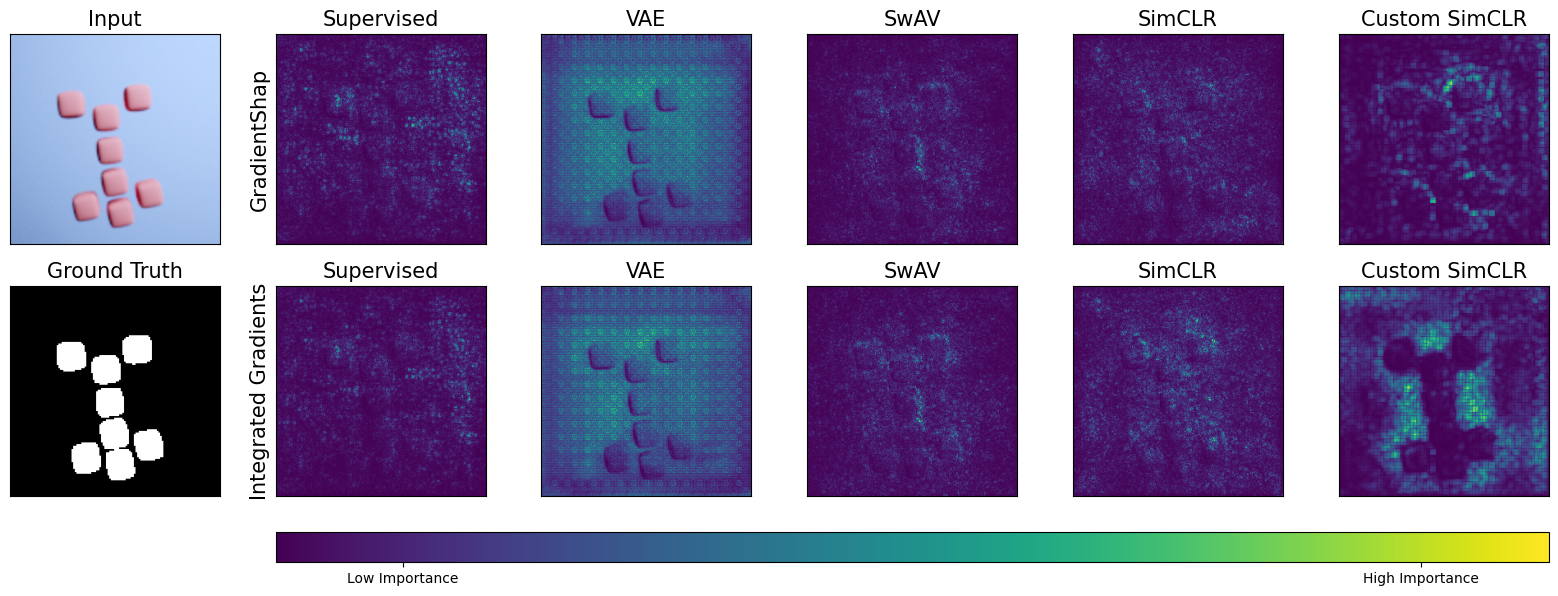

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))

font_size = 15

#iterate over generated ig + gs explenations and visualize them
for idx, (model_name) in enumerate(model_name_list):
  #gradient shap
  if idx == 0: ax[0][idx+1].set_ylabel('GradientShap', fontsize=font_size)
  ax[0][idx+1].imshow(imsc(x[0]))
  im = ax[0][idx+1].imshow(np.abs(shap_list[idx][0]).sum(axis=0))
  ax[0][idx+1].set_xticks([])
  ax[0][idx+1].set_yticks([])
  ax[0][idx+1].set_title(model_name, fontsize=font_size)

  #integrated gradients
  if idx == 0: ax[1][idx+1].set_ylabel('Integrated Gradients', fontsize=font_size)
  ax[1][idx+1].imshow(imsc(x[0]))
  ax[1][idx+1].imshow(np.abs(ig_list[idx][0]).sum(axis=0))
  ax[1][idx+1].set_xticks([])
  ax[1][idx+1].set_yticks([])
  ax[1][idx+1].set_title(model_name, fontsize=font_size)

#visualize input image
ax[0][0].imshow(imsc(x[0]))
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][0].set_title('Input', fontsize=font_size)

#visualize mask
ax[1][0].imshow(mask.squeeze(), cmap='gist_gray')
ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][0].set_title('Ground Truth', fontsize=font_size)

#calculate position for horizontal colorbar
p0 = ax[1][1].get_position().get_points().flatten()
p2 = ax[1][-1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0, p2[2]-p0[0], 0.05])
cbar = fig.colorbar(im, orientation="horizontal", cax=ax_cbar)
#cbar.set_ticks([])

#colorbar labels
inter_dist = im.get_array().max() - im.get_array().min()
p_10 = im.get_array().min() + inter_dist * 0.1
p_90 = im.get_array().min() + inter_dist * 0.9
cbar.set_ticks([p_10, p_90])
cbar.ax.set_xticklabels(['Low Importance', 'High Importance'])  # Add labels to the colorbar

plt.show()

In [ ]:
#calculate top-k intersection for fun
#we look at integrated gradients for SwAV (i.e. ig_list[2])
a=np.abs(ig_list[2][0]).sum(axis=0).squeeze()
s=to_np(mask.squeeze())

k=1000
#prepare shapes
s = s.astype(bool)
top_k_binary_mask = np.zeros(a.shape)

#sort and create masks
sorted_indices = np.argsort(a, axis=None)
np.put_along_axis(top_k_binary_mask, sorted_indices[-k:], 1, axis=None)
top_k_binary_mask = top_k_binary_mask.astype(bool)

#top-k intersection
tki = 1.0 / k * np.sum(np.logical_and(s, top_k_binary_mask))

print(tki)

0.47700000000000004


### Example 2 (bird) 🐦

In [37]:
#example image 2 for visualization
x = load_img('Ex2')
test_loader = DataLoader([[x[0], torch.Tensor([0])]], batch_size=1, shuffle=False)

model_name_list = ['Supervised', 'VAE', 'SwAV', 'SimCLR', 'Custom SimCLR']
model_list = [load_supervised, load_vae, load_swav, load_simclr, load_pretrained_simclr]
shap_list = []
ig_list = []

for model_loader, model_name in zip(model_list, model_name_list):

  model = model_loader()

  with torch.no_grad():

    baseline = torch.zeros((1, 3, 256, 256)).to(DEVICE) # black image as baseline
    attr_method1 = GradientShap(model)
    attr_method2 = IntegratedGradients(model)
    feature_importance_shap = lffi(model, test_loader, DEVICE, attr_method1, baseline)
    feature_importance_ig = lffi(model, test_loader, DEVICE, attr_method2, baseline)

  shap_list.append(feature_importance_shap)
  ig_list.append(feature_importance_ig)

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v0.9.0 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/vae/vae-stl10/checkpoints/epoch%3D89.ckpt`
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v0.9.1rc3 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/swav/swav_imagenet/swav_imagenet.pth.tar`
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.0.4 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imag

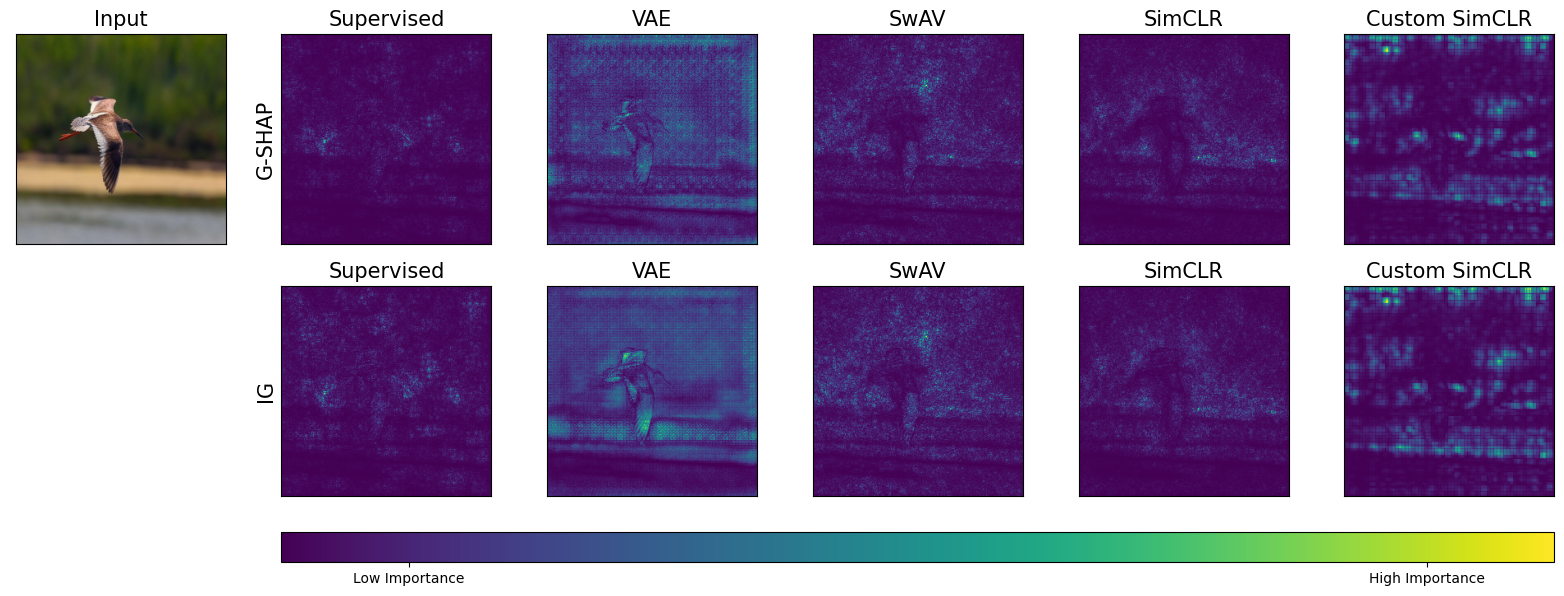

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))

font_size = 15

#iterate over generated ig + gs explenations and visualize them
for idx, (model_name) in enumerate(model_name_list):
  #gradient shap
  if idx == 0: ax[0][idx+1].set_ylabel('G-SHAP', fontsize=font_size)
  ax[0][idx+1].imshow(imsc(x[0]))
  im = ax[0][idx+1].imshow(np.abs(shap_list[idx][0]).sum(axis=0))
  ax[0][idx+1].set_xticks([])
  ax[0][idx+1].set_yticks([])
  ax[0][idx+1].set_title(model_name, fontsize=font_size)

  #integrated gradients
  if idx == 0: ax[1][idx+1].set_ylabel('IG', fontsize=font_size)
  ax[1][idx+1].imshow(imsc(x[0]))
  ax[1][idx+1].imshow(np.abs(ig_list[idx][0]).sum(axis=0))
  ax[1][idx+1].set_xticks([])
  ax[1][idx+1].set_yticks([])
  ax[1][idx+1].set_title(model_name, fontsize=font_size)

#visualize input image
ax[0][0].imshow(imsc(x[0]))
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][0].set_title('Input', fontsize=font_size)

#visualize mask
#ax[1][0].imshow(mask.squeeze(), cmap='gist_gray')
ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][0].set(frame_on=False)
#ax[1][0].set_title('Ground Truth', fontsize=font_size)

#calculate position for horizontal colorbar
p0 = ax[1][1].get_position().get_points().flatten()
p2 = ax[1][-1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0, p2[2]-p0[0], 0.05])
cbar = fig.colorbar(im, orientation="horizontal", cax=ax_cbar)
cbar.set_ticks([])

#colorbar labels
inter_dist = im.get_array().max() - im.get_array().min()
p_10 = im.get_array().min() + inter_dist * 0.1
p_90 = im.get_array().min() + inter_dist * 0.9
cbar.set_ticks([p_10, p_90])
cbar.ax.set_xticklabels(['Low Importance', 'High Importance'])

plt.show()

### Example 3 (2 cats) 🐈🐈‍⬛

In [41]:
#example image 3 for visualization
x = load_img('Ex3')
test_loader = DataLoader([[x[0], torch.Tensor([0])]], batch_size=1, shuffle=False)

model_name_list = ['Supervised', 'VAE', 'SwAV', 'SimCLR', 'Custom SimCLR']
model_list = [load_supervised, load_vae, load_swav, load_simclr, load_pretrained_simclr]
shap_list = []
ig_list = []

for model_loader, model_name in zip(model_list, model_name_list):

  model = model_loader()

  with torch.no_grad():

    baseline = torch.zeros((1, 3, 256, 256)).to(DEVICE) # black image as baseline
    attr_method1 = GradientShap(model)
    attr_method2 = IntegratedGradients(model)
    feature_importance_shap = lffi(model, test_loader, DEVICE, attr_method1, baseline)
    feature_importance_ig = lffi(model, test_loader, DEVICE, attr_method2, baseline)

  shap_list.append(feature_importance_shap)
  ig_list.append(feature_importance_ig)

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v0.9.0 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/vae/vae-stl10/checkpoints/epoch%3D89.ckpt`
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v0.9.1rc3 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/swav/swav_imagenet/swav_imagenet.pth.tar`
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.0.4 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imag

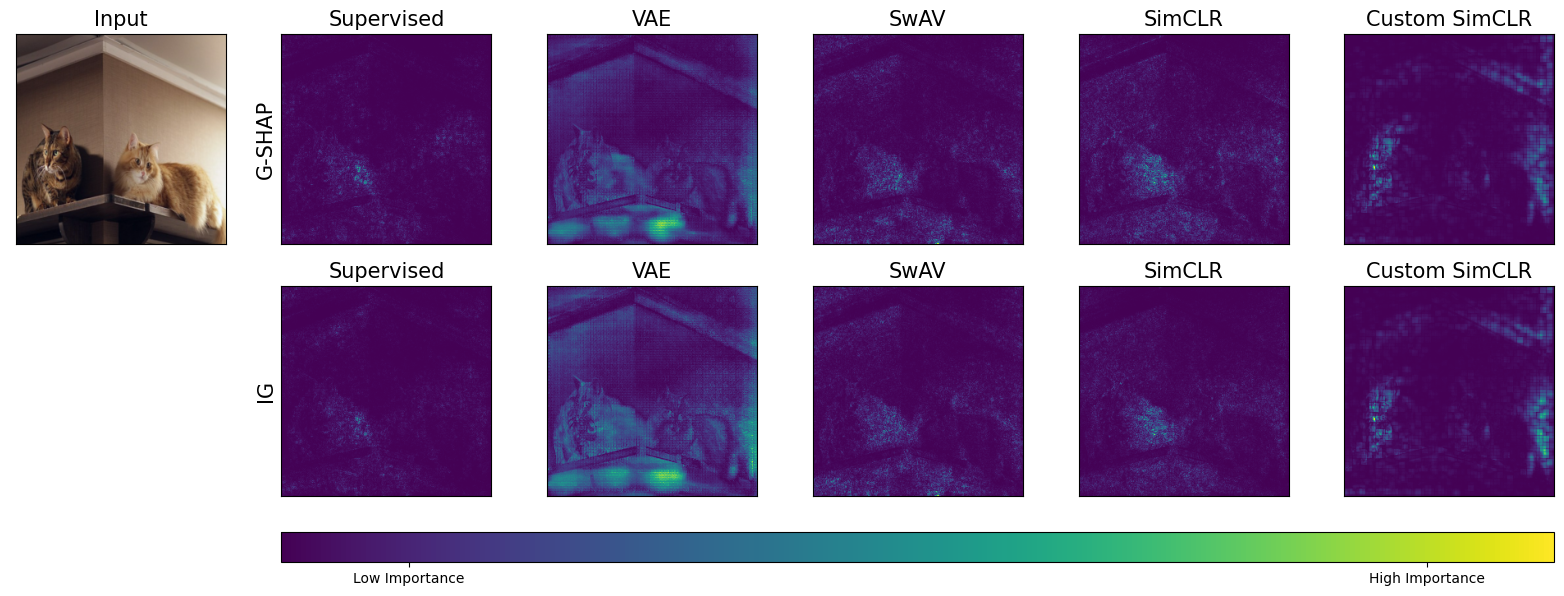

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))

font_size = 15

#iterate over generated ig + gs explenations and visualize them
for idx, (model_name) in enumerate(model_name_list):
  #gradient shap
  if idx == 0: ax[0][idx+1].set_ylabel('G-SHAP', fontsize=font_size)
  ax[0][idx+1].imshow(imsc(x[0]))
  im = ax[0][idx+1].imshow(np.abs(shap_list[idx][0]).sum(axis=0))
  ax[0][idx+1].set_xticks([])
  ax[0][idx+1].set_yticks([])
  ax[0][idx+1].set_title(model_name, fontsize=font_size)

  #integrated gradients
  if idx == 0: ax[1][idx+1].set_ylabel('IG', fontsize=font_size)
  ax[1][idx+1].imshow(imsc(x[0]))
  ax[1][idx+1].imshow(np.abs(ig_list[idx][0]).sum(axis=0))
  ax[1][idx+1].set_xticks([])
  ax[1][idx+1].set_yticks([])
  ax[1][idx+1].set_title(model_name, fontsize=font_size)

#visualize input image
ax[0][0].imshow(imsc(x[0]))
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][0].set_title('Input', fontsize=font_size)

#visualize mask
#ax[1][0].imshow(mask.squeeze(), cmap='gist_gray')
ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][0].set(frame_on=False)
#ax[1][0].set_title('Ground Truth', fontsize=font_size)

#calculate position for horizontal colorbar
p0 = ax[1][1].get_position().get_points().flatten()
p2 = ax[1][-1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0, p2[2]-p0[0], 0.05])
cbar = fig.colorbar(im, orientation="horizontal", cax=ax_cbar)
cbar.set_ticks([])

#colorbar labels
inter_dist = im.get_array().max() - im.get_array().min()
p_10 = im.get_array().min() + inter_dist * 0.1
p_90 = im.get_array().min() + inter_dist * 0.9
cbar.set_ticks([p_10, p_90])
cbar.ax.set_xticklabels(['Low Importance', 'High Importance'])

plt.show()

## LFFI QUANTITATIVE EXPERIMENT 🧑‍🔬️

In [ ]:
# on Google Colab this takes a long time
# we had to run this multiple times over multiple google accounts
# and calculate the mean over all the runs for our final quantitative result
# the metrics didn't change much at all over the different runs, they converge fairly fast

from google.colab import drive
import os
import warnings
import numpy as np
warnings.filterwarnings("ignore")


drive.mount('/content/drive')
list_images = sorted(os.listdir('drive/MyDrive/242/test'))

model_name_list = ['Supervised', 'SimCLR', 'SwAV', 'VAE', 'Custom SimCLR']
model_list = [load_supervised, load_simclr, load_swav, load_vae, load_pretrained_simclr]
mask_bs = 100
num_batches = 30

tk_list = [[], []]
pg_list = [[], []]
rra_list = [[], []]

for i in range(0, 5000, 2):
  shap_list = []
  ig_list = []

  image_name1 = list_images[i*2]
  mask_name1 = list_images[(i*2)+1]
  x1 = load_img_from_drive(image_name1)
  mask1 = load_mask_from_drive(mask_name1)

  image_name2 = list_images[(i*2)+2]
  mask_name2 = list_images[(i*2)+3]
  x2 = load_img_from_drive(image_name2)
  mask2 = load_mask_from_drive(mask_name2)

  masks = [mask1, mask2]

  test_loader = DataLoader([
        [x1[0], torch.Tensor([0])],
        [x2[0], torch.Tensor([0])]
      ], batch_size=2, shuffle=False)

  for model_loader, model_name in zip(model_list, model_name_list):

    model = model_loader()

    with torch.no_grad():

        baseline = torch.zeros((1, 3, IMAGE_SIZE, IMAGE_SIZE)).to(DEVICE) # black image as baseline
        attr_method1 = GradientShap(model)
        attr_method2 = IntegratedGradients(model)
        feature_importance_shap = lffi(model, test_loader, DEVICE, attr_method1, baseline)
        feature_importance_ig = lffi(model, test_loader, DEVICE, attr_method2, baseline)

    shap_list.append(feature_importance_shap)
    ig_list.append(feature_importance_ig)

  list_of_expl = [shap_list,ig_list]
  for m in range(2):
    expl_list = list_of_expl[m]
    for l in range(2):
      relax_list = []
      tk_indv_list = []
      pg_indv_list = []
      rra_indiv_list = []
      mask = masks[l]
      for j in range(5):
        s=to_np(mask.squeeze())
        #a=to_np(relax_list[j].importance().cpu().squeeze())
        a=np.abs(expl_list[j][l]).sum(axis=0).squeeze()

        k=1000
        #prepare shapes
        s = s.astype(bool)
        top_k_binary_mask = np.zeros(a.shape)

        #top-k intersection
        #sort and create masks
        sorted_indices = np.argsort(a, axis=None)
        np.put_along_axis(top_k_binary_mask, sorted_indices[-k:], 1, axis=None)
        top_k_binary_mask = top_k_binary_mask.astype(bool)
        tki = 1.0 / k * np.sum(np.logical_and(s, top_k_binary_mask))

        # #pointing game
        # #find indices with max value
        # max_index = np.argwhere(a == np.max(a))
        # #check if maximum of explanation is on target object class.
        # hit = np.any(s[max_index])
        #pointing game
        a_pg = a.copy().flatten()
        s_pg = to_np(mask.squeeze()).flatten().astype(bool)
        #find indices with max value
        max_index = np.argwhere(a_pg == np.max(a_pg))
        #check if maximum of explanation is on target object class.
        hit = np.any(s_pg[max_index])

        #relevance rank accuracy
        s = to_np(mask.squeeze())
        s = np.where(s.flatten().astype(bool))[0]
        #size of the ground truth mask
        n = len(s)
        #sort in descending order
        a_sorted = np.argsort(a.flatten())[-int(n) :]
        #calculate hits
        hits = len(np.intersect1d(s, a_sorted))
        if hits != 0:
            rank_accuracy = hits / float(n)
        else:
            rank_accuracy = 0.0

        tk_indv_list.append(tki)
        pg_indv_list.append(np.float(hit))
        rra_indiv_list.append(rank_accuracy)
      tk_list[m].append(tk_indv_list)
      pg_list[m].append(pg_indv_list)
      rra_list[m].append(rra_indiv_list)

      #   #prepare shapes
      #   s = s.astype(bool)
      #   top_k_binary_mask = np.zeros(a.shape)

      #   #sort and create masks
      #   sorted_indices = np.argsort(a, axis=None)
      #   np.put_along_axis(top_k_binary_mask, sorted_indices[-k:], 1, axis=None)
      #   top_k_binary_mask = top_k_binary_mask.astype(bool)

      #   #top-k intersection
      #   tki = 1.0 / k * np.sum(np.logical_and(s, top_k_binary_mask))
      #   tk_indv_list.append(tki)
      # tk_list.append(tk_indv_list)


    if i % 20 == 0: #print rolling mean after every **20** images processed.ss
      print(i)
      print(model_name_list)
      print(['Gradient SHAP', 'Integrated Gradients'][m])
      print('Pointing Game:')
      print(np.array(pg_list[m]).mean(axis=0))
      print('Top-K:')
      print(np.array(tk_list[m]).mean(axis=0))
      print('Relevance Rank Acc.:')
      print(np.array(rra_list[m]).mean(axis=0))
      print('-----------------------------------------------------------------')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0
['Supervised', 'SimCLR', 'SwAV', 'VAE', 'Custom SimCLR']
Gradient SHAP
Pointing Game:
[0.5 0.5 1.  0.5 0.5]
Top-K:
[0.24   0.414  0.5825 0.406  0.5885]
Relevance Rank Acc.:
[0.19994762 0.25847797 0.33430221 0.2998712  0.24637425]
-----------------------------------------------------------------
0
['Supervised', 'SimCLR', 'SwAV', 'VAE', 'Custom SimCLR']
Integrated Gradients
Pointing Game:
[0.  1.  0.5 1.  0.5]
Top-K:
[0.196  0.5125 0.61   0.397  0.1635]
Relevance Rank Acc.:
[0.21346268 0.29029472 0.35230487 0.29456091 0.12426718]
-----------------------------------------------------------------
20
['Supervised', 'SimCLR', 'SwAV', 'VAE', 'Custom SimCLR']
Gradient SHAP
Pointing Game:
[0.22727273 0.68181818 0.86363636 0.63636364 0.59090909]
Top-K:
[0.30372727 0.54181818 0.681      0.38290909 0.48772727]
Relevance Rank Acc.:
[0.24583752 0.36377583 0.42384548 0.2

#RANDOM BASELINE METRICS

In [ ]:
from google.colab import drive
import os
import warnings
warnings.filterwarnings("ignore")


drive.mount('/content/drive')
list_images = sorted(os.listdir('drive/MyDrive/242/test'))


base_tk_list = []
base_pg_list = []
base_rr_list = []

for i in range(0,5000):
  relax_list = []
  mask_name = list_images[(i*2)+1]
  mask = load_mask_from_drive(mask_name)


  s=to_np(mask.squeeze())
  a=np.random.rand(IMAGE_SIZE,IMAGE_SIZE)

  k=1000
  #prepare shapes
  s = s.astype(bool)
  top_k_binary_mask = np.zeros(a.shape)

  #top-k intersection
  #sort and create masks
  sorted_indices = np.argsort(a, axis=None)
  np.put_along_axis(top_k_binary_mask, sorted_indices[-k:], 1, axis=None)
  top_k_binary_mask = top_k_binary_mask.astype(bool)
  tki = 1.0 / k * np.sum(np.logical_and(s, top_k_binary_mask))

  #pointing game
  a_pg = a.copy().flatten()
  s_pg = to_np(mask.squeeze()).flatten().astype(bool)
  #find indices with max value
  max_index = np.argwhere(a_pg == np.max(a_pg))
  #check if maximum of explanation is on target object class.
  hit = np.any(s_pg[max_index])

  #relevance rank accuracy
  s = to_np(mask.squeeze())
  s = np.where(s.flatten().astype(bool))[0]
  #size of the ground truth mask
  n = len(s)
  #sort in descending order
  a_sorted = np.argsort(a.flatten())[-int(n) :]
  #calculate hits
  hits = len(np.intersect1d(s, a_sorted))
  if hits != 0:
      rank_accuracy = hits / float(n)
  else:
      rank_accuracy = 0.0

  base_tk_list.append(tki)
  base_pg_list.append(hit)
  base_rr_list.append(rank_accuracy)
  #every 250 print the moving average top-k for randomly generating an attribution mask for the two4two dataset
  if i % 25 == 0:
    print(i)
    print('Baseline Top-K:')
    print(np.array(base_tk_list).mean())
    print('Baseline Pointing-Game:')
    print(np.array(base_pg_list).mean())
    print('Baseline Relevance-Rank-Acc.:')
    print(np.array(base_rr_list).mean())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0
Baseline Top-K:
0.167
Baseline Pointing-Game:
0.0
Baseline Relevance-Rank-Acc.:
0.15998062015503875
25
Baseline Top-K:
0.14196153846153847
Baseline Pointing-Game:
0.11538461538461539
Baseline Relevance-Rank-Acc.:
0.14232711577466384
50
Baseline Top-K:
0.14033333333333334
Baseline Pointing-Game:
0.0784313725490196
Baseline Relevance-Rank-Acc.:
0.14203268270770045
75
Baseline Top-K:
0.14201315789473687
Baseline Pointing-Game:
0.07894736842105263
Baseline Relevance-Rank-Acc.:
0.14250712590438633
100
Baseline Top-K:
0.14264356435643563
Baseline Pointing-Game:
0.0891089108910891
Baseline Relevance-Rank-Acc.:
0.14280245105672773
125
Baseline Top-K:
0.142563492063492
Baseline Pointing-Game:
0.10317460317460317
Baseline Relevance-Rank-Acc.:
0.14303885605363426
150
Baseline Top-K:
0.14298675496688742
Baseline Pointing-Game:
0.12582781456953643
Baseline Relevance-Ran

KeyboardInterrupt: ignored